## Building The CNN Model For Fashion Mnist

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import keras
from keras.datasets import fashion_mnist

## Loading the DataSet

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
## 60000 : number of images
## 28*28 : resolution of the image

x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
## lets see an image how it looks like
## 0 : represent absence of light
## 255 : which represent presnce of light
## 128 : inbetween number are the shades of white and black

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[1]

0

In [ ]:
"""
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
"""

'\n0: T-shirt/top\n1: Trouser\n2: Pullover\n3: Dress\n4: Coat\n5: Sandal\n6: Shirt\n7: Sneaker\n8: Bag\n9: Ankle boot\n'

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
len(class_labels)

10

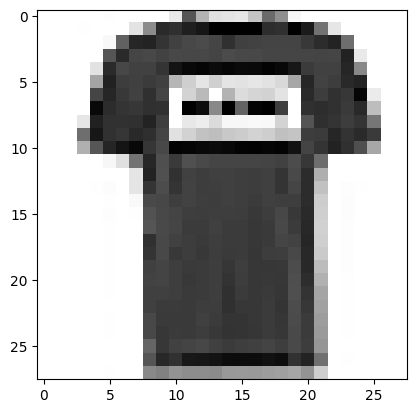

In [ ]:
## inorder to visuallize image plt.imshow() is the function

plt.imshow(x_train[1],cmap = "Greys")

In [ ]:
x_train.ndim   # 60000*28*28

3

In [ ]:
## expand the dimensions of image

x_train = np.expand_dims(x_train,-1)

x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train.ndim   ##60000*28*28*1

4

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Scaling of Images inorder to have early convergence

In [ ]:
## Min max Scaler

x_train = x_train/255

x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
## split the dataset in train_test_split

x_train,x_val,y_train,y_val = train_test_split(
                                            x_train,
                                            y_train,
                                            random_state = 42,
                                            test_size = 0.2
)

In [ ]:
#60000 48000 12000 10000

In [ ]:
x_train.shape,x_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

## Building the Architecture for CNN model

In [ ]:
model = keras.models.Sequential([

        keras.layers.Conv2D(filters = 32,kernel_size = 3,strides = (1,1),padding = "valid",activation = "relu",input_shape = [28,28,1]),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 128,activation = "relu"),
        keras.layers.Dense(units = 10 ,activation = "softmax")

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model.fit(

          x_train,
          y_train,
          epochs = 30,
          batch_size = 512,
          verbose = True,
          validation_data = (x_val,y_val)
)

Epoch 1/30
94/94 [==============================] - 14s 12ms/step - loss: 0.6285 - accuracy: 0.7883 - val_loss: 0.4294 - val_accuracy: 0.8500
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3902 - accuracy: 0.8646 - val_loss: 0.3728 - val_accuracy: 0.8662
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3449 - accuracy: 0.8794 - val_loss: 0.3266 - val_accuracy: 0.8827
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3139 - accuracy: 0.8890 - val_loss: 0.3080 - val_accuracy: 0.8888
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2908 - accuracy: 0.8980 - val_loss: 0.3039 - val_accuracy: 0.8903
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2709 - accuracy: 0.9043 - val_loss: 0.2975 - val_accuracy: 0.8937
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2558 - accuracy: 0.9088 - val_loss: 0.2834 - val_accuracy: 0.8965
Epoch 8/30
94/94 [

##Tesing the model

In [ ]:
model.predict(np.expand_dims(x_test[1],axis = 0)).round(2)

1/1 [==============================] - 0s 34ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[1]

2

In [ ]:
y_pred = model.predict(x_test).round(2)

313/313 [==============================] - 2s 4ms/step


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2787 - accuracy: 0.9088


[0.2786531150341034, 0.9088000059127808]

<Axes: >

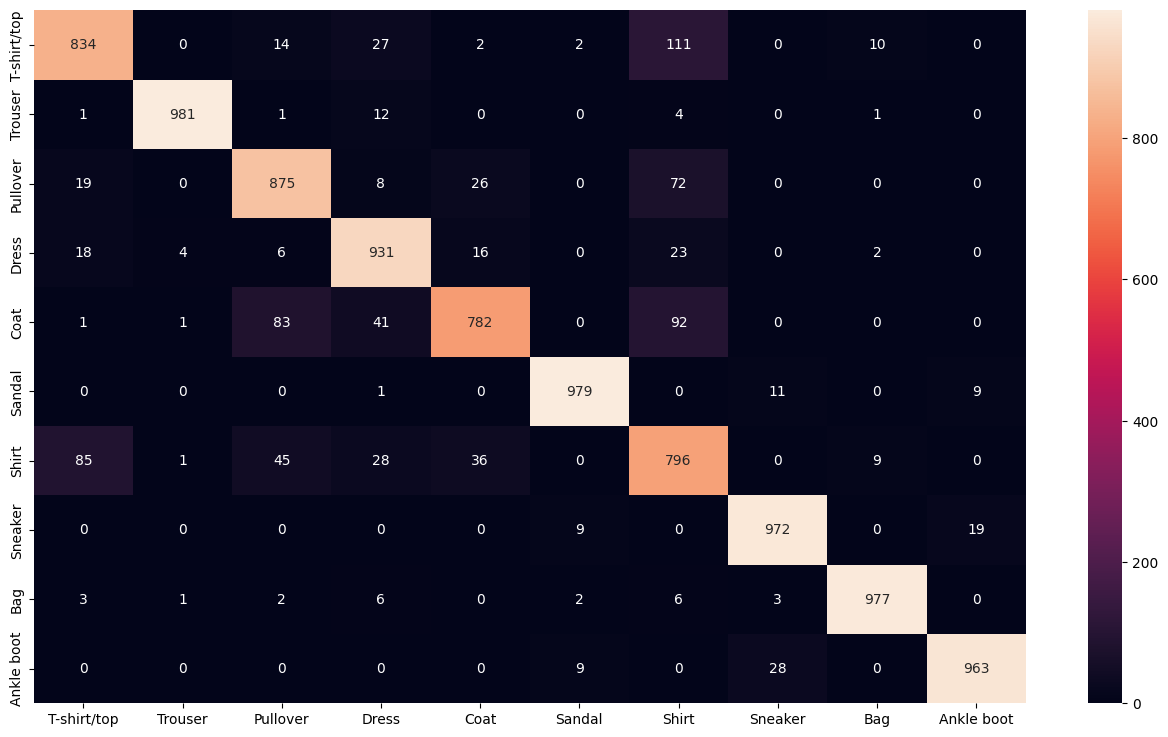

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]

cnf = confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cnf,
            annot = True,
            fmt = "d",
            xticklabels = class_labels,
            yticklabels = class_labels)